In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
%matplotlib inline
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

In [16]:
skin = pd.read_csv(r'C:\Users\fadhi\Desktop\Stat 517\Final Project\Skin_HAM10000.csv')

In [17]:
print (skin.shape)
print (skin.label.value_counts())

(10015, 193)
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64


In [19]:
y = pd.DataFrame([skin.label]).T # Separating the response variable
x = pd.DataFrame(skin)
x = skin.drop(['label'], axis = 1)
print (x.shape)
print (y.shape)

(10015, 192)
(10015, 1)


In [20]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 7, test_size = 0.25)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(7511, 192)
(2504, 192)
(7511, 1)
(2504, 1)


In [22]:
from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()
GNB_model.fit(xtrain, ytrain)
y_mod = GNB_model.predict(xtest)
accuracy_GNB1 = round(GNB_model.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(accuracy_GNB1))
accuracy_GNB2 = round(accuracy_score(ytest, y_mod) * 100, 2)
print ('Testing accuracy = {}'.format(accuracy_GNB2))

Training accuracy = 43.98
Testing accuracy = 44.05


In [23]:
SVC_model = SVC() # Calling the support vector machine function
SVC_model.fit(xtrain, ytrain)
y_mod = SVC_model.predict(xtest)
accuracy_SVC1 = round(SVC_model.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(accuracy_SVC1))
accuracy_SVC2 = round(accuracy_score(ytest, y_mod) * 100, 2)
print ('Testing accuracy = {}'.format(accuracy_SVC2))

Training accuracy = 100.0
Testing accuracy = 68.13


In [24]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]

In [25]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 7, test_size = 0.25)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(7511, 192)
(2504, 192)
(7511L, 7L)
(2504L, 7L)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Knn_Model = KNeighborsClassifier(n_neighbors = 3)
Knn_Model.fit(xtrain, ytrain) #Fitting the model
y_mod = Knn_Model.predict(xtest) #Predicting response variable
accuracy_Knn1 = round(Knn_Model.score(xtrain, ytrain) * 100, 2) # Testing the accuracy between xtrain and ytrain
print ('Training Accuracy = {}'.format(accuracy_Knn1))
accuracy_Knn2 = round(accuracy_score(ytest, y_mod) * 100, 2) # Testing the accuracy between ytest and y_mod
print ('Testing Accuracy = {}'.format(accuracy_Knn2))

Training Accuracy = 78.02
Testing Accuracy = 67.45


In [27]:
auc1= roc_auc_score(ytest, y_mod) # Generates area under ROC curve
auc1

0.5862853793661529

In [28]:
Dtree_model = DecisionTreeClassifier()
Dtree_model.fit(xtrain, ytrain)
y_mod = Dtree_model.predict(xtest)
accuracy_Dtree1 = round(Dtree_model.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(accuracy_Dtree1))
accuracy_Dtree2 = round(accuracy_score(ytest, y_mod) * 100, 2)
print ('Testing accuracy = {}'.format(accuracy_Dtree2))

Training accuracy = 100.0
Testing accuracy = 60.78


In [29]:
auc2= roc_auc_score(ytest, y_mod) # Generates area under ROC curve
auc2

0.5852490168400832

In [30]:
skin_forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
skin_forest.fit(xtrain, ytrain)
y_mod = skin_forest.predict(xtest)
accuracy_random_forest1 = round(skin_forest.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(accuracy_random_forest1))
accuracy_random_forest2 = round(accuracy_score(ytest, y_mod) * 100, 2)
print ('Testing accuracy = {}'.format(accuracy_random_forest2))

Training accuracy = 99.99
Testing accuracy = 61.3


In [31]:
auc3= roc_auc_score(ytest, y_mod) # Generates area under ROC curve
auc3

0.5496156076955966

In [32]:
MLP_model = MLPClassifier(random_state=57)
MLP_model.fit(xtrain, ytrain)
y_mod = MLP_model.predict(xtest)
accuracy_MLP1 = round(skin_forest.score(xtrain, ytrain) * 100, 2)
print("Training Accuracy: {:.2f}".format(accuracy_MLP1))
accuracy_MLP2 = round(skin_forest.score(xtest, ytest) * 100, 2)
print("Testing Accuracy: {:.2f}".format(accuracy_MLP2))

Training Accuracy: 99.99
Testing Accuracy: 61.30


In [33]:
auc4= roc_auc_score(ytest, y_mod) # Generates area under ROC curve
auc4

0.5418992967000286

In [34]:
models_summary1 = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree','Random Forest', 'Gaussian naive Bayes', 'Support vector machines', 'MLP Classifier'],
    'Training Score': [accuracy_Knn1, accuracy_Dtree1, accuracy_random_forest1, accuracy_GNB1, accuracy_SVC1, accuracy_MLP1],
    'Testing Score': [accuracy_Knn2, accuracy_Dtree2, accuracy_random_forest2, accuracy_GNB2, accuracy_SVC2, accuracy_MLP2],
     })
models_summary1

,Model,Testing Score,Training Score
0,KNN,67.45,78.02
1,Decision Tree,60.78,100.00
2,Random Forest,61.30,99.99
3,Gaussian naive Bayes,44.05,43.98
4,Support vector machines,68.13,100.00
5,MLP Classifier,61.30,99.99


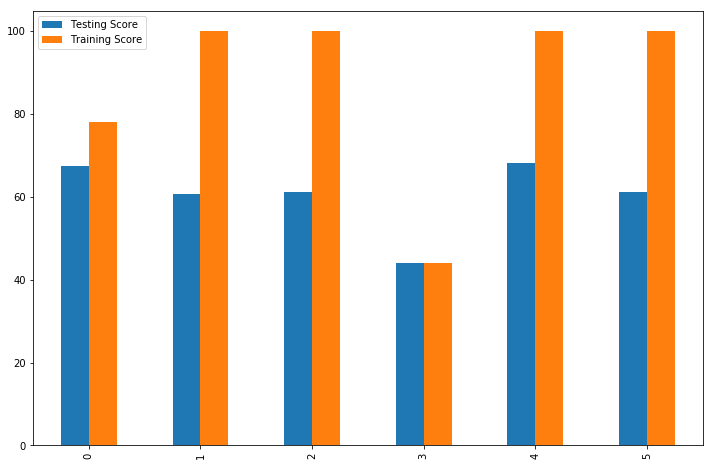

In [35]:
models_summary1.plot(kind = 'bar', figsize = (12, 8))

In [36]:
models_summary2 = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree','Random Forest', 'MLP Classifier'],
    'ROC Score': [auc1, auc2, auc3, auc4],
     })
models_summary2

,Model,ROC Score
0,KNN,0.586285
1,Decision Tree,0.585249
2,Random Forest,0.549616
3,MLP Classifier,0.541899
